# Data preprocessing

In [ ]:
import numpy as np
import math
import pandas as pd
import os
import matplotlib.pyplot as plt
import kagglehub

Read Dataset

In [2]:
path = kagglehub.dataset_download("ashishpatel26/facial-expression-recognitionferchallenge")
df =  pd.read_csv(os.path.join(path,"fer2013", "fer2013", "fer2013.csv"), delimiter=",", header=0)
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


Figure out the dimension of the images (48x48)

In [3]:
len(df["pixels"][0])
math.sqrt(len(df.pixels[0].split(" ")))

48.0

Code to check wether the number of pixels of any of the images in the dataset aren't perfect squares

In [4]:
pixel_count = len(df.pixels[0].split(' '))

for i in range(0, len(df["pixels"])):
    if not math.sqrt(pixel_count).is_integer():
        print(i)

expected_pixels = 48 * 48
for i in range(0, len(df["pixels"])):
    if pixel_count != expected_pixels:
        print(i)

Preview of the dataset

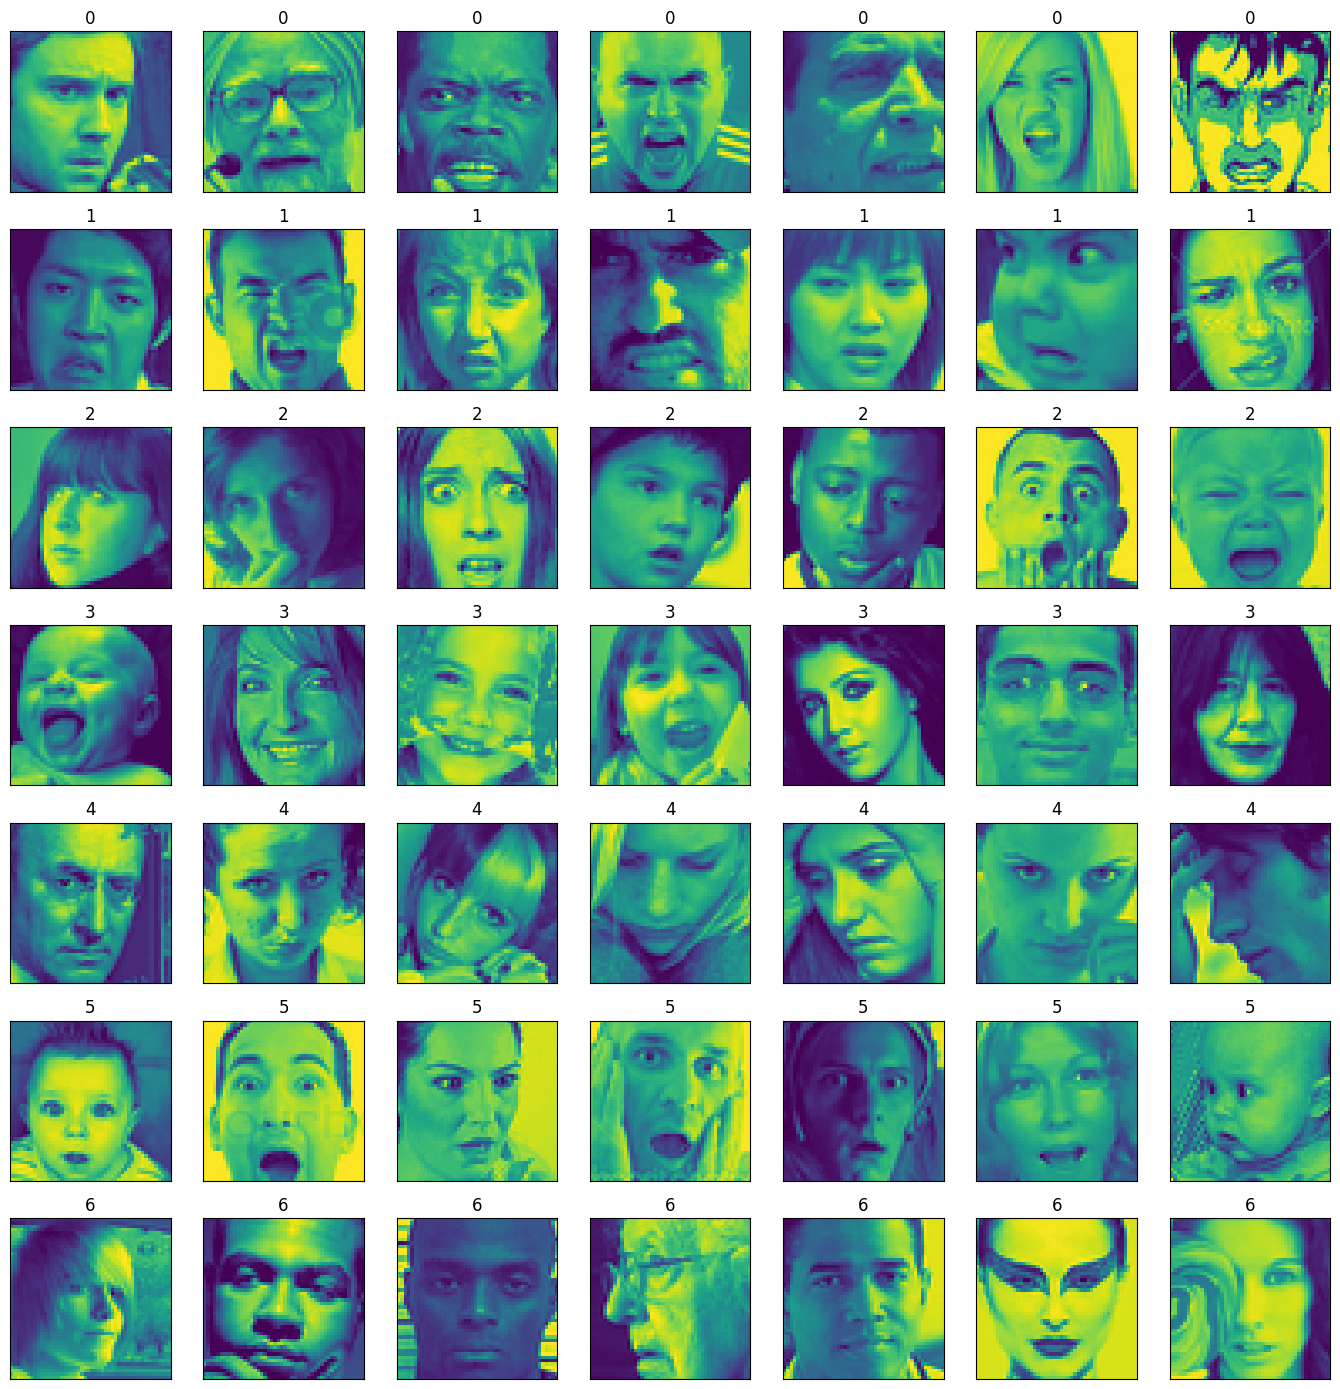

In [5]:
fig = plt.figure(1, (14, 14))

k = 0
for label in sorted(df["emotion"].unique()):
    for j in range(7):
        px = df[df["emotion"]==label]["pixels"].iloc[k]
        px = np.array(px.split(" ")).reshape(48, 48).astype("float32")

        k += 1
        ax = plt.subplot(7, 7, k)
        ax.imshow(px)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(label)
        plt.tight_layout()

There are 7 different emotions in the dataset

In [6]:
emotion_counts = df["emotion"].value_counts()
print(emotion_counts)

emotion
3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: count, dtype: int64


Based on the preview we can assign names to the labels

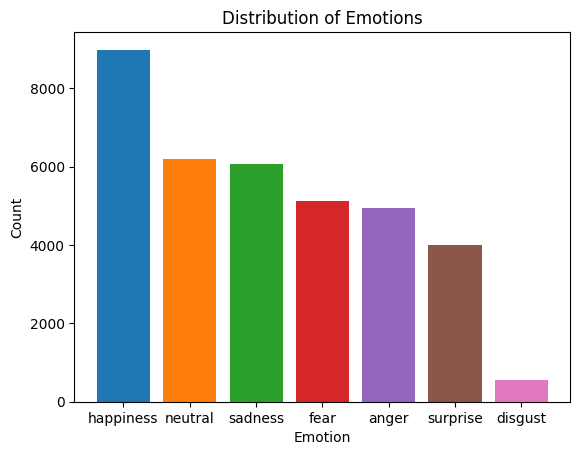

In [7]:
label_to_text = {0:"anger", 1:"disgust", 2:"fear", 3:"happiness", 4: "sadness", 5: "surprise", 6: "neutral"}
x_labels = [label_to_text[label] for label in emotion_counts.keys()]

# Get different colors for bars
colors = plt.cm.tab10(range(len(emotion_counts)))

plt.bar(x_labels, emotion_counts.values, color=colors)

plt.xlabel("Emotion")
plt.ylabel("Count")
plt.title("Distribution of Emotions")

plt.show()

Converts all strings of pixels into a numpy-array of floating point numbers

In [8]:
df["pixels"] = df["pixels"].apply(lambda x: np.array(x.split(" ")).astype("float32"))
df.head()

,emotion,pixels,Usage
0,0,"[70.0, 80.0, 82.0, 72.0, 58.0, 58.0, 60.0, 63....",Training
1,0,"[151.0, 150.0, 147.0, 155.0, 148.0, 133.0, 111...",Training
2,2,"[231.0, 212.0, 156.0, 164.0, 174.0, 138.0, 161...",Training
3,4,"[24.0, 32.0, 36.0, 30.0, 32.0, 23.0, 19.0, 20....",Training
4,6,"[4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Training


Apply gaussian blur to all the images

In [9]:
import cv2

df["pixels"] = df["pixels"].apply(lambda x: cv2.GaussianBlur(x, (3, 3), 0))
df.head()

,emotion,pixels,Usage
0,0,"[[75.0], [78.0], [79.0], [71.0], [61.5], [58.5...",Training
1,0,"[[150.5], [149.5], [149.75], [151.25], [146.0]...",Training
2,2,"[[221.5], [202.75], [172.0], [164.5], [162.5],...",Training
3,4,"[[28.0], [31.0], [33.5], [32.0], [29.25], [24....",Training
4,6,"[[2.0], [1.0], [0.0], [0.0], [0.0], [0.0], [0....",Training


In [10]:
df["pixels"] = df["pixels"].apply(lambda x: x.reshape(48, 48))
df.head()

,emotion,pixels,Usage
0,0,"[[75.0, 78.0, 79.0, 71.0, 61.5, 58.5, 60.25, 6...",Training
1,0,"[[150.5, 149.5, 149.75, 151.25, 146.0, 131.25,...",Training
2,2,"[[221.5, 202.75, 172.0, 164.5, 162.5, 152.75, ...",Training
3,4,"[[28.0, 31.0, 33.5, 32.0, 29.25, 24.25, 20.25,...",Training
4,6,"[[2.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",Training


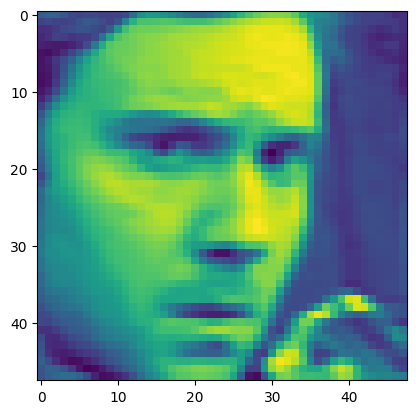

In [11]:
plt.imshow(df["pixels"][0].astype(np.uint8))

Normalize pixel values to between 0 and 1

In [12]:
df["pixels"] = df["pixels"].apply(lambda x: x / 255.0)
df["pixels"][0]

array([[0.29411766, 0.30588236, 0.30980393, ..., 0.20392157, 0.1754902 ,
        0.18627451],
       [0.22745098, 0.24019608, 0.22941177, ..., 0.21372549, 0.2       ,
        0.18627451],
       [0.18333334, 0.18627451, 0.21078432, ..., 0.19117647, 0.20392157,
        0.18431373],
       ...,
       [0.30392158, 0.25784314, 0.18235295, ..., 0.29313725, 0.22254902,
        0.21470588],
       [0.2735294 , 0.3137255 , 0.30392158, ..., 0.3735294 , 0.28529412,
        0.23431373],
       [0.26666668, 0.2990196 , 0.32058823, ..., 0.40784314, 0.39803922,
        0.3745098 ]], dtype=float32)

Split dataset into testing and training sets

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(df["pixels"], df["emotion"], test_size=0.2, random_state=1)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=2)
X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape


((28709,), (3589,), (3589,), (28709,), (3589,), (3589,))

# Image classification with SVM

Flatten and reduce dimensionality with PCA in preparation for SVM

In [14]:
from sklearn.decomposition import PCA

X_train_SVM = np.array([img.flatten() for img in X_train])
X_test_SVM = np.array([img.flatten() for img in X_test])
X_val_SVM = np.array([img.flatten() for img in X_test])

# Reduce to 100 principal components
pca = PCA(n_components=100, random_state=1)
X_train_PCA = pca.fit_transform(X_train_SVM)
X_test_PCA = pca.transform(X_test_SVM)
X_val_PCA = pca.transform(X_val_SVM)

Build model with parameters found to be best by testing

In [15]:
from sklearn.svm import SVC
  
# Creating a support vector classifier (parameters chosen by trial and error)
svc=SVC(probability=True, random_state=2, kernel="rbf", gamma="auto", C=10) 
  
svc.fit(X_train_PCA, y_train)

# rbf, gamma=auto, C=10

SVC(C=10, gamma='auto', probability=True, random_state=2)

Accuracy report

In [16]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

# Predict on test data
y_pred = svc.predict(X_test_PCA)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.49
Classification Report:
              precision    recall  f1-score   support

           0       0.34      0.36      0.35       490
           1       0.79      0.31      0.44        49
           2       0.39      0.36      0.37       507
           3       0.60      0.68      0.64       949
           4       0.40      0.40      0.40       617
           5       0.67      0.61      0.64       386
           6       0.46      0.42      0.44       591

    accuracy                           0.49      3589
   macro avg       0.52      0.45      0.47      3589
weighted avg       0.49      0.49      0.49      3589



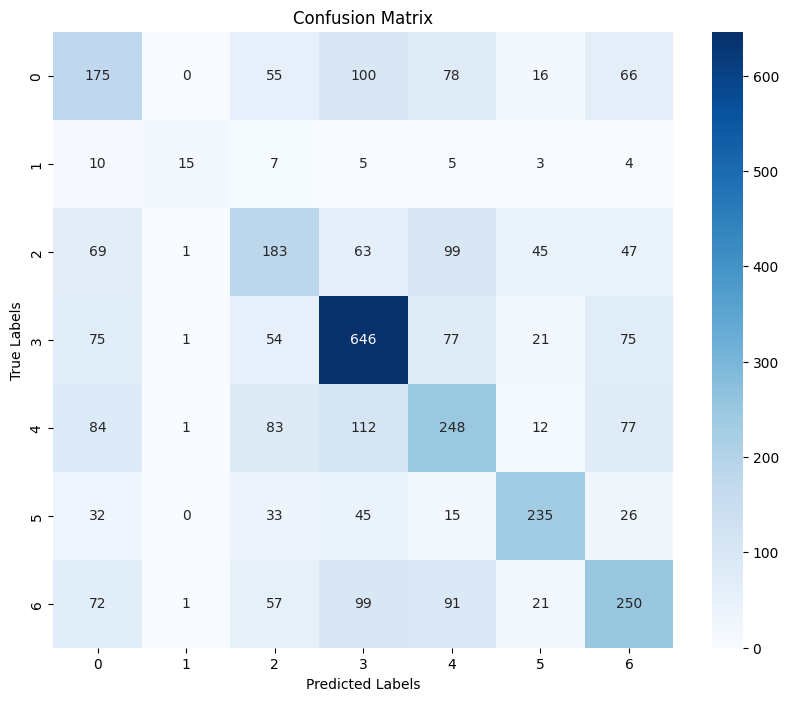

In [17]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(df["emotion"].values), yticklabels=np.unique(df["emotion"].values))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Image classification using a CNN

Convert datasets into correct format

In [18]:
# Convert to 3D array
X_train_CNN = np.stack(X_train)
X_test_CNN = np.stack(X_test)
X_val_CNN = np.stack(X_val)

# Add channel dimension
X_train_CNN = X_train_CNN[..., np.newaxis]
X_val_CNN = X_val_CNN[..., np.newaxis]
X_test_CNN = X_test_CNN[..., np.newaxis]

y_train_CNN = np.array(y_train)
y_test_CNN = np.array(y_test)
y_val_CNN = np.array(y_val)

Build and compile model

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input, BatchNormalization
from tensorflow.keras.optimizers import Adam


model = Sequential()
model.add(Input(shape=(48, 48, 1)))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))

model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

model.summary()


model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_CNN, y_train_CNN, epochs=30, validation_data=(X_val_CNN, y_val_CNN), batch_size=32)

2024-11-25 19:04:14.794147: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-25 19:04:14.800982: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1732557854.808558  213465 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1732557854.810598  213465 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-25 19:04:14.818225: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 48, 48, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     4,719,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         3,59

 Total params: 5,870,535 (22.39 MB)

 Trainable params: 5,868,743 (22.39 MB)

 Non-trainable params: 1,792 (7.00 KB)

Epoch 1/30


I0000 00:00:1732557858.728939  215877 service.cc:148] XLA service 0x7efa7402dc00 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1732557858.728962  215877 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 4090, Compute Capability 8.9
2024-11-25 19:04:18.766849: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1732557858.977039  215877 cuda_dnn.cc:529] Loaded cuDNN version 90300


 21/898 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.1851 - loss: 4.3991

I0000 00:00:1732557862.070549  215877 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


898/898 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.2437 - loss: 2.1685 - val_accuracy: 0.3700 - val_loss: 1.6419
Epoch 2/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3501 - loss: 1.6396 - val_accuracy: 0.4269 - val_loss: 1.4892
Epoch 3/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4024 - loss: 1.5245 - val_accuracy: 0.4550 - val_loss: 1.4278
Epoch 4/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4434 - loss: 1.4403 - val_accuracy: 0.4843 - val_loss: 1.3423
Epoch 5/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4688 - loss: 1.3689 - val_accuracy: 0.5026 - val_loss: 1.3530
Epoch 6/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4977 - loss: 1.3000 - val_accuracy: 0.5199 - val_loss: 1.2539
Epoch 7/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5221 - loss: 1.2517 - val_accuracy: 0.5456 - val_loss: 1.2101
Epoch 8/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5418 - loss: 1.2024 - val_accuracy: 0.5472 - val

Evaluation

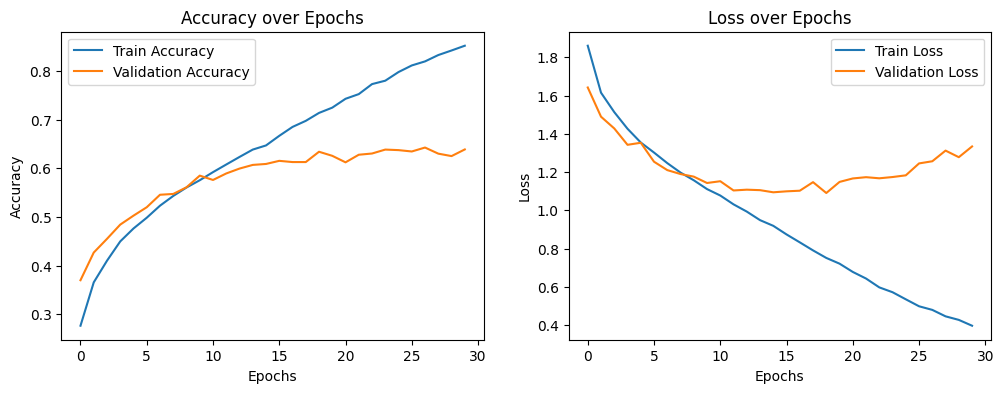

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6558 - loss: 1.1966
Test Accuracy: 0.6467
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
              precision    recall  f1-score   support

           0       0.54      0.55      0.54       490
           1       0.66      0.43      0.52        49
           2       0.53      0.44      0.48       507
           3       0.84      0.86      0.85       949
           4       0.50      0.58      0.54       617
           5       0.78      0.78      0.78       386
           6       0.58      0.57      0.57       591

    accuracy                           0.65      3589
   macro avg       0.63      0.60      0.61      3589
weighted avg       0.65      0.65      0.65      3589



In [20]:


# Plot Training History
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Evaluate on Test Data
test_loss, test_accuracy = model.evaluate(X_test_CNN, y_test_CNN)
print(f'Test Accuracy: {test_accuracy:.4f}')

y_pred = np.argmax(model.predict(X_test_CNN), axis=1)

print(classification_report(y_test_CNN, y_pred))

Confusion matrix

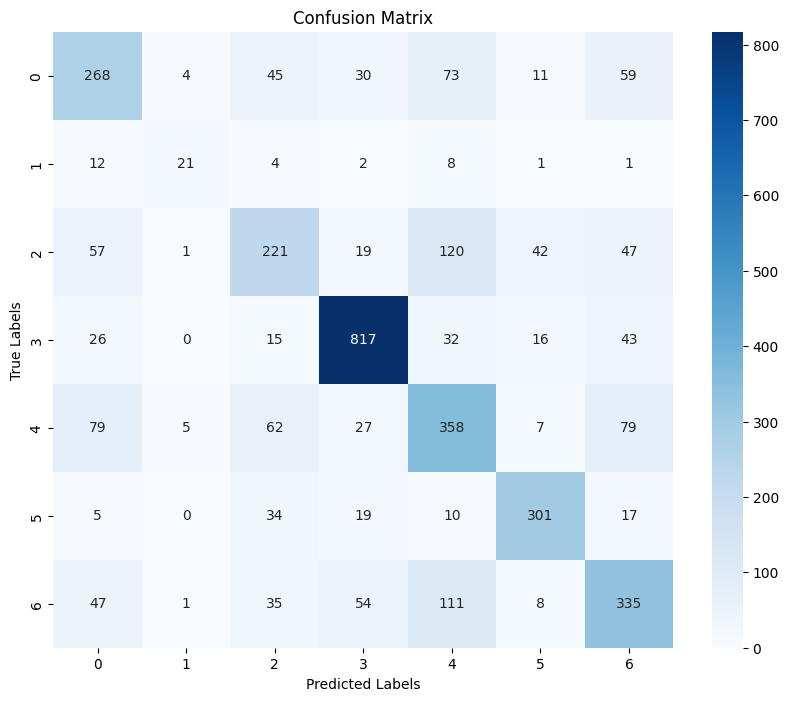

In [21]:
cm = confusion_matrix(y_test_CNN, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(df["emotion"].values), yticklabels=np.unique(df["emotion"].values))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()